In [1]:
import numpy as np
import sympy as sp
from sympy.plotting import plot
from sympy.parsing.sympy_parser import parse_expr
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
sp.init_printing(use_latex = 'mathjax')

In [3]:
def getPoints(f, l, r, n):
    delta = (r - l) / (n - 1)
    points = []
    for i in range(n):
        points.append((l + i * delta, f.subs(list(f.free_symbols)[0], l + i * delta)))
    return points

# LagrangePolynomial

In [4]:
def lagrange(f):
    pol = np.zeros(len(f), dtype = 'float')
    allMult = np.zeros(len(f) + 1)
    allMult[0] = 1
    for i in range(len(f)):
        allMultPr = allMult.copy()
        for j in range(len(allMult)):
            allMult[j] = -allMult[j] * f[i][0]
        for j in range(len(allMult) - 1):
            allMult[j + 1] = allMult[j + 1] + allMultPr[j]
    for i in range(len(f)):
        res = np.zeros(len(f))
        curr = allMult.copy()
        for j in range(len(curr) - 1, 0, -1):
            curr[j - 1] = curr[j - 1] + curr[j] * f[i][0]
            res[j - 1] = curr[j]
        coef = f[i][1]
        for j in range(len(f)):
            if(i != j):
                coef = coef / (f[i][0] - f[j][0])
        for j in range(len(res)):
            pol[j] = pol[j] + res[j] * coef
    x = sp.symbols('x')
    expr = sp.Float(pol[0])
    for i in range(1, len(pol)):
        expr += pol[i] * x**i
    return expr

### Lagrange form

In [5]:
class lagrangePol:
    points = []
    free_symbols = [' ']
    def __init__(self, pnts):
        self.points = sorted(pnts)
    def calc(self, val):
        res = 0.
        for i in range(len(self.points)):
            coef = self.points[i][1]
            for j in range(len(self.points)):
                if i != j:
                    coef = coef * (val - self.points[j][0]) / (self.points[i][0] - self.points[j][0])
            res = res + coef
        return res
    def calcList(self, valList):
        return [self.calc(val) for val in valList]
    def subs(self, trash, val):
        return self.calc(val)

# Newtons Polynomial

In [6]:
def newtonCoef(f):
    if len(f) == 1:
        return f[0][0]
    tab = np.zeros([2, len(f)], dtype = 'float')
    coef = np.empty(len(f), dtype = 'float')
    coef[0] = f[0][1]
    for i in range(len(f)):
        tab[0, i] = f[i][1]
    for i in range(1, len(f)):
        for j in range(len(f) - i):
            tab[i % 2, j] = (tab[(i - 1) % 2, j] - tab[(i - 1) % 2, j + 1])/(f[j][0] - f[j + i][0])
        coef[i] = tab[i % 2, 0]
    return coef

In [7]:
class newtonPol:
    coef = []
    point = []
    free_symbols = [' ']
    def __init__(self, f):
        f = sorted(f)
        self.coef = newtonCoef(f)
        self.point = [i[0] for i in f]
    def prnt(self):
        print(self.coef)
    def calc(self, val):
        res = 0.
        term = 1.
        for i in range(len(self.coef)):
            res = res + term * self.coef[i]
            term = term * (val - self.point[i])
        return res
    def calcList(self, valList):
        res = np.empty(len(valList))
        for i in range(len(valList)):
            res[i] = self.calc(valList[i])
    def subs(self, trash, val):
        return self.calc(val)

# Trying functions and points

In [8]:
def parsePoints(s):
    points = []
    pairs = s.split(';')
    for pair in pairs:
        fun = pair.split()
        points.append((float(fun[0]), float(fun[1])))
    return points

                  4                     3                     2               
- 12.84618413063⋅x  + 46.4744952545019⋅x  - 50.5001968490953⋅x  + 15.871885725

            
2235⋅x + 1.0

Lagrange polynomial


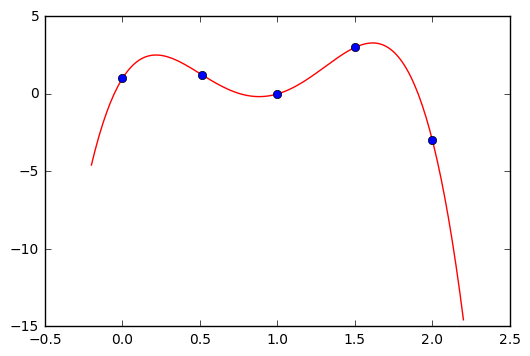

Newtons polynomial


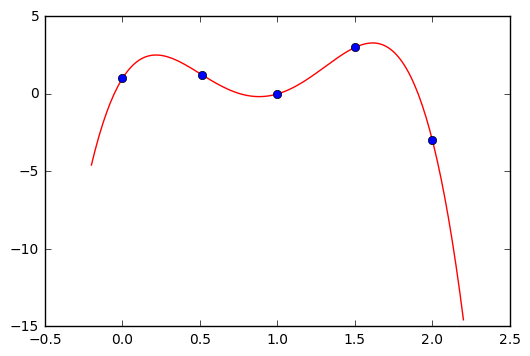

In [9]:
with open('input.txt') as f:
    lines = f.readlines()
for i in range(len(lines)):
    points = parsePoints(lines[i])
    nPol = newtonPol(points)
    lPol = lagrangePol(points)
    
    val, image = map(list, zip(*points))
    points = sorted(points)
    l, r = points[0][0], points[-1][0]
    nVal, nImage = map(list, zip(*getPoints(nPol, l - 0.2, r + 0.2, int(100*(r - l)))))
    lVal, lImage = map(list, zip(*getPoints(lPol, l - 0.2, r + 0.2, int(100*(r - l)))))
    plt.plot(lVal, lImage, 'red', val, image, 'bo')
    display(lagrange(points))
    print('Lagrange polynomial')
    plt.show()
    plt.plot(nVal, nImage, 'red', val, image, 'bo')
    print('Newtons polynomial')
    plt.show()

            ⎛ 2⎞
            ⎜x ⎟
x⋅log(x)⋅sin⎜──⎟
            ⎝10⎠

                        19                         18                        1
- 3.68806692456929e-12⋅x   + 3.44416160023804e-10⋅x   - 1.49062397986276e-8⋅x 

7                      16                        15                         14
  + 3.980146112325e-7⋅x   - 7.36210751583994e-6⋅x   + 0.000100364569376277⋅x  

                        13                        12                       11 
 - 0.00104665406461804⋅x   + 0.00854763064009267⋅x   - 0.0554732735562125⋅x   

                     10                   9                     8             
+ 0.288542136677002⋅x   - 1.207214801502⋅x  + 4.05974360765441⋅x  - 10.9193165

        7                     6                     5                     4   
255983⋅x  + 23.2587025549342⋅x  - 38.6191627142271⋅x  + 48.8034053151287⋅x  - 

                 3                    2                                       
45.027612582754⋅x  + 28.536367986716⋅x  - 11.1207232071674⋅x + 1.9238805945762

 
5

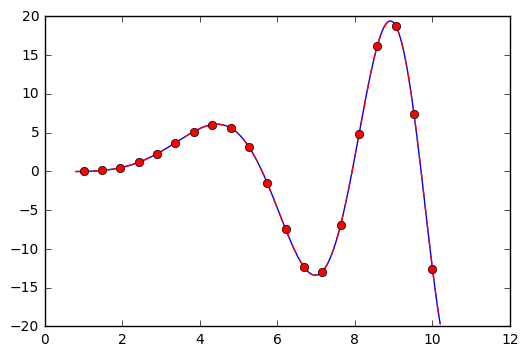

 3             
x  + 2⋅x + 12.5

                     19                        18                        17   
2.91156538878568e-8⋅x   - 1.14157592179254e-6⋅x   + 2.96852085739374e-5⋅x   - 

                      16                       15                       14    
0.000230040401220322⋅x   + 0.0016254335641861⋅x   - 0.0113984942436218⋅x   + 0

                   13                      12                      11         
.0519423484802246⋅x   - 0.139369964599609⋅x   + 0.764247894287109⋅x   - 1.4845

            10                     9                     8                    
7336425781⋅x   + 2.65959167480469⋅x  + 1.68583679199219⋅x  + 14.0727844238281⋅

 7                     6                     5                     4          
x  + 18.2803344726563⋅x  + 49.0930480957031⋅x  + 94.9349212646484⋅x  + 215.184

           3                     2                                        
379577637⋅x  + 467.352949142456⋅x  + 1035.58457541466⋅x + 2316.79872986674

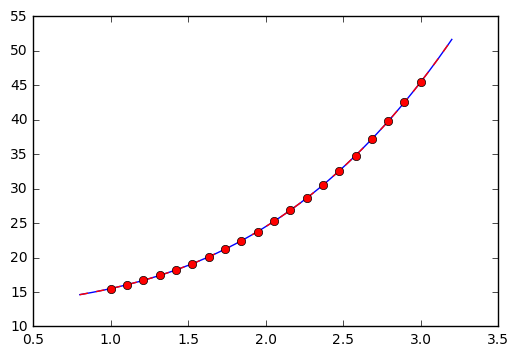

In [10]:
with open('inputFunc.txt') as f:
    fileData = f.read()
lines = fileData.split(';')
for l in lines:
    line = l.split('\n')
    line = [x for x in line if x]
    expr = parse_expr(line[0])
    nums = line[1].split()
    l = float(nums[0])
    r = float(nums[1])
    n = int(nums[2])

    points = getPoints(expr, l, r, n)
    pVal, pImage = map(list, zip(*points))
    lPol = lagrangePol(points)
    nPol = newtonPol(points)
    delta = 0.2
    val, image = map(list, zip(*getPoints(expr, l - delta, r + delta, int(100*(r - l)))))
    lVal, lImage = map(list, zip(*getPoints(lPol, l - delta, r + delta, int(100*(r - l)))))
    nVal, nImage = map(list, zip(*getPoints(nPol, l - delta, r + delta, int(100*(r - l)))))

    display(expr)
    display(lagrange(points))
    plt.plot(val, image, lVal, lImage, 'r--', pVal, pImage, 'ro')
    # plt.xlim(0, 3)
    # plt.ylim(-3, 3)
    # plt.gca().set_aspect('equal', adjustable='box')
    # print("Lagrange polynomial")
    plt.show()
    #plt.plot(val, image, nVal, nImage, 'r--', pVal, pImage, 'ro')
    # print("Newton polynomial")
    # plt.show()
    print()